## Proyecto 1 - Parte 2

### 1. Analisis Descriptivos
---

#### 1.1 Resumen Dataset
- Tenemos 12 columnas y 8523 filas.
- Tenemos valores nulos en la columna 'Item_Weight'. Espramos reemplazarlos con el promedio de 'Item_Weight' por 'item_fat_content' y 'item_type'.
- Tenemos valores nulos en la columna 'Outlet_Size'. Al ser una columna categorica, veremos que otras variables podemos usar.
- Solo tenemos 3 tiendas sin 'Outlet_Size', pero son mas filas porque se repite por su cantidad de productos.
- Tenemos Item_Fat_Content con labels repetidos y erroneos que hay que aunar. Deajaremos solo dos valores en esta columna, 'Regular' y 'Low Fat'.
- Tenemos atributos de productos y locales en el dataset, ademas de la venta final por producto y local (Item_Outlet_Sales).

In [344]:
# Importamo librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import math

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

# Linear Regression
from sklearn.linear_model import LinearRegression


In [345]:
# Leemos el archivo CSV que contiene la data:
file = r'C:/Users/Juan.Paredes/Unilever/Data & Analytics CL DEV - General/Nacho/1. Visual Studio Scripts/CURSO DOJO/6. Ejercicio Prediccion Ventas (Parte 2)/sales_predictions (1).csv'
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 1.2 Analisis Estadistico Descriptivo
---
- Tenemos records con Item_Visibility en 0, esto diria que no tienen visibilidad en la tienda, debemos revisar si es un error que debemos arreglar.
- La base contiene 1559 productos diferentes en su catalogo que son vendidos en 10 tiendas/outlers.
- El peso promedio de los productos es de 12.8 KG.
- El precio promedio de los productos es de $ 140.99.
- La venta promedio por sala/producto es de $ 2181.28.
- Vemos que la variable que tiene mayor correlacion con la venta es Item_MRP que es el precio del producto.
- La tienda con mayor venta es la **OUT027**.

In [347]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [348]:
# Revisamos si hay correlacion entre las variables 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_9500\2147982438.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


Text(0.5, 1.0, 'A Histogram of Item_Outlet_Sales')

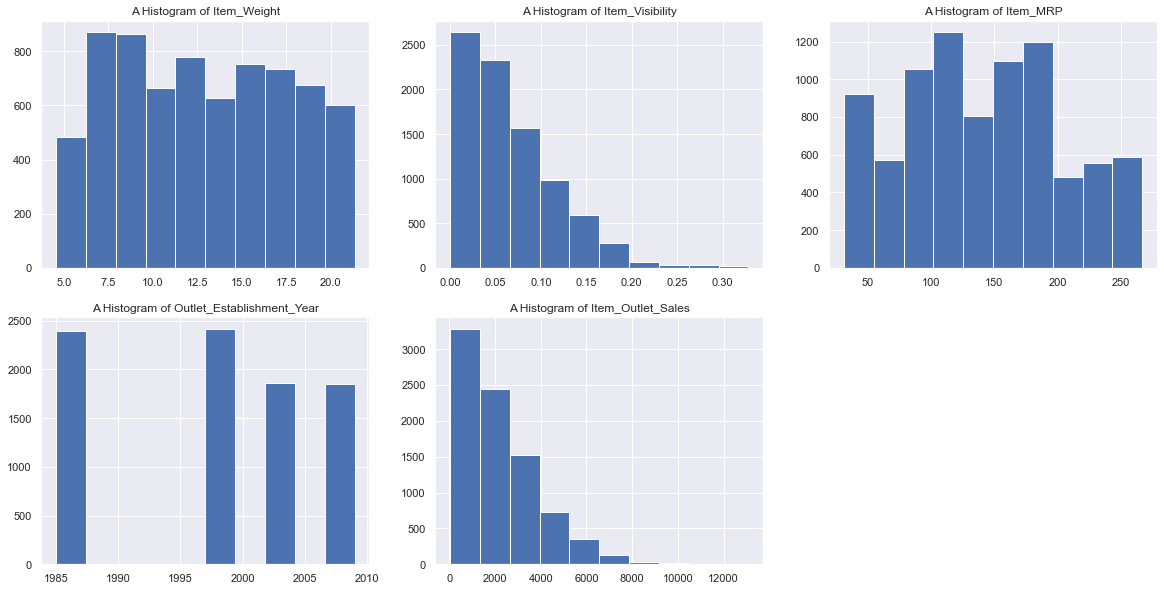

In [349]:
# Revisamos Histogramas de las variables

plt.subplots(figsize=(20, 10))

# #create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium, high]]
# labels= ["low","medium", "high"]
# plt.legend(handles, labels)


### Primer Histograma
plt.subplot(2,3,1)
plt.hist(df['Item_Weight'])
plt.title('A Histogram of Item_Weight')

### Segundo Histograma
plt.subplot(2,3,2)
plt.hist(df['Item_Visibility'])
plt.title('A Histogram of Item_Visibility')

### Tercer Histograma
plt.subplot(2,3,3)
plt.hist(df['Item_MRP'])
plt.title('A Histogram of Item_MRP')

### Cuarto Histograma
plt.subplot(2,3,4)
plt.hist(df['Outlet_Establishment_Year'])
plt.title('A Histogram of Outlet_Establishment_Year')

### Quinto Histograma
plt.subplot(2,3,5)
plt.hist(df['Item_Outlet_Sales'])
plt.title('A Histogram of Item_Outlet_Sales')

In [350]:
# Revisamos cuantos productos y locales unicos tenemos:

n_items = df['Item_Identifier'].nunique()
n_outlets = df['Outlet_Identifier'].nunique()

print('La base sales tiene ' + str(n_items) + ' productos en su catalogo, atendiendo en '+ str(n_outlets) +' tiendas/outlers.')

La base sales tiene 1559 productos en su catalogo, atendiendo en 10 tiendas/outlers.


[Text(0, 0, '188340'),
 Text(0, 0, '2.14266e+06'),
 Text(0, 0, '2.16747e+06'),
 Text(0, 0, '1.85182e+06'),
 Text(0, 0, '179694'),
 Text(0, 0, '3.45393e+06'),
 Text(0, 0, '2.26812e+06'),
 Text(0, 0, '2.03673e+06'),
 Text(0, 0, '2.1184e+06'),
 Text(0, 0, '2.18397e+06')]

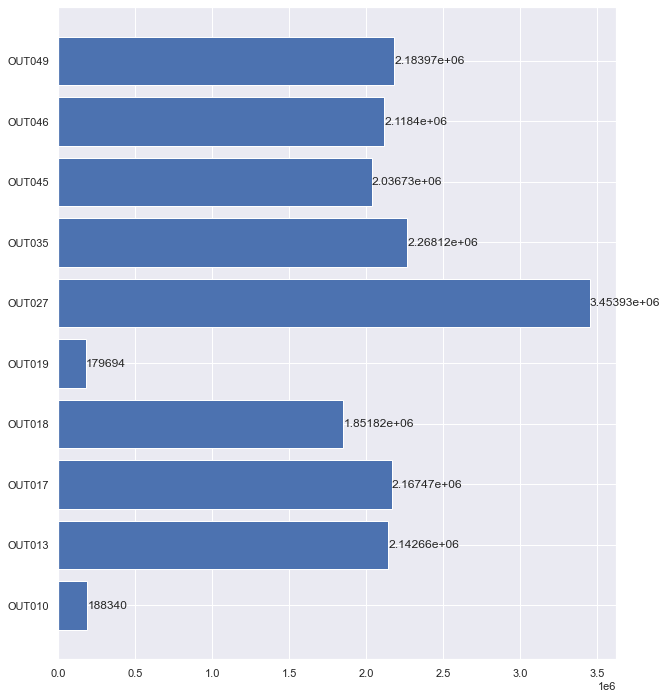

In [351]:
# Revisamos cuales son los locales con mayor venta
df_stores = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()

fig, ax = plt.subplots()
bars = ax.barh(df_stores['Outlet_Identifier'], df_stores['Item_Outlet_Sales'])
ax.bar_label(bars)

[Text(0, 0, '5089'),
 Text(0, 0, '2889'),
 Text(0, 0, '112'),
 Text(0, 0, '316'),
 Text(0, 0, '117')]

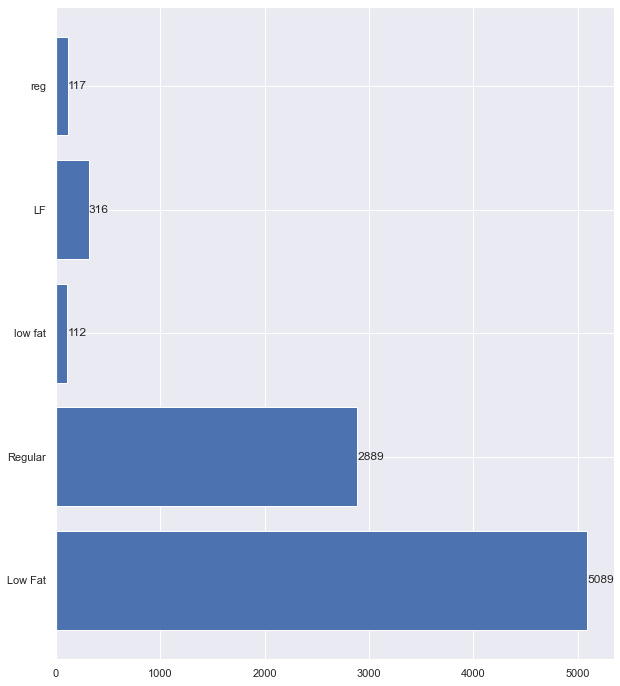

In [352]:
# Revisamos la columna Item_Fat_Content
item = df['Item_Fat_Content'].unique()
lista = []

for i in item:
    x = (df['Item_Identifier'].loc[df['Item_Fat_Content'] == i]).count()
    lista.append(x)

x = item
y = lista

fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

[Text(0, 0, '932'), Text(0, 0, '2793'), Text(0, 0, '2410'), Text(0, 0, '2388')]

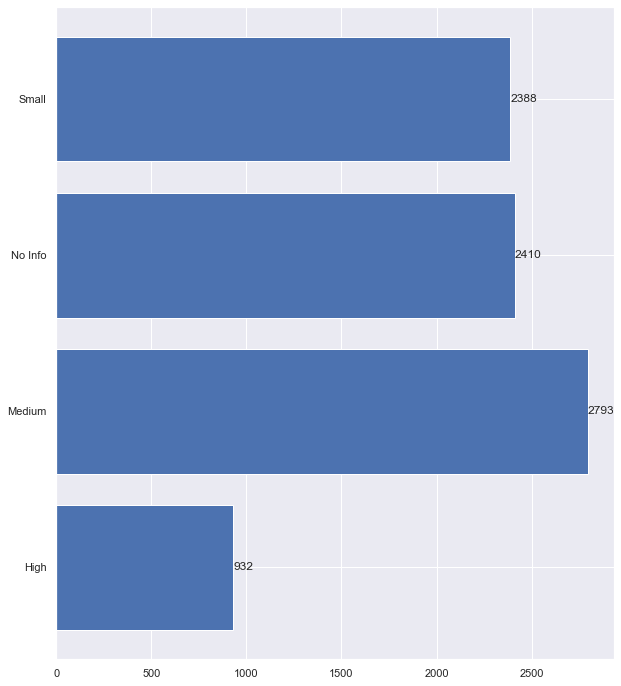

In [353]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Type'].count().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Type']

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

[Text(0, 0, '1'), Text(0, 0, '3'), Text(0, 0, '3'), Text(0, 0, '3')]

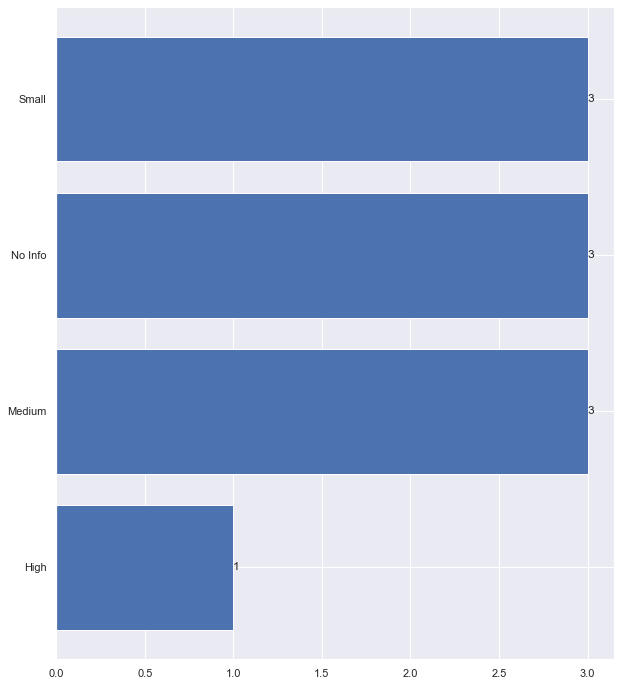

In [354]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Identifier'].nunique().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

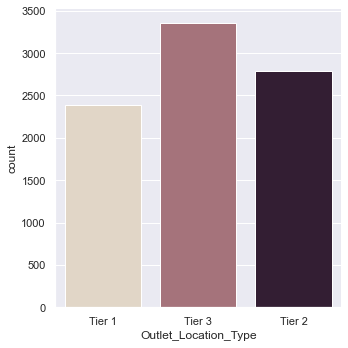

In [355]:
# Revisamos Outlet_Location

sns.catplot(x="Outlet_Location_Type", kind="count", palette="ch:.25", data=df)

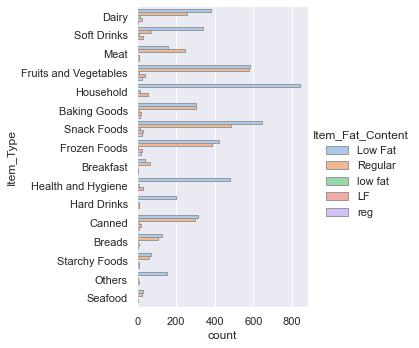

In [356]:
sns.catplot(y="Item_Type", hue="Item_Fat_Content", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [357]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Info,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,No Info,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 2. Transformaciones y Tratamiento de Nulos
---

#### 2.0 Correccion Datos Erroneos **(Item_Fat_Content)**

[Text(0, 0, '5517'), Text(0, 0, '3006')]

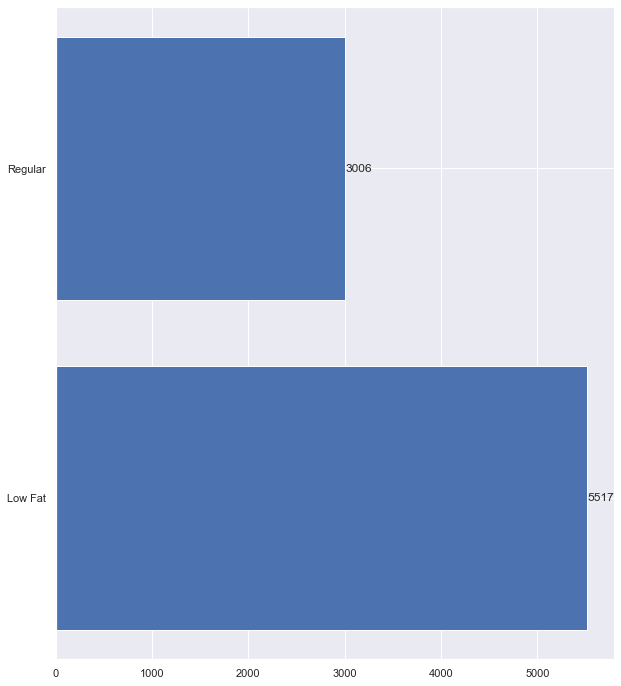

In [358]:
# Creamos un diccionario para remapear los nombres mal escritos de Fat Content para poder hacer un dataframe.

dic = {'LF': 'Low Fat','low fat':'Low Fat' , 'reg':'Regular'}

# Hacmeos el reemplazo:
df.replace({"Item_Fat_Content": dic},inplace=True)

#Revisamos la columna:
df['Item_Fat_Content'].unique()


############################
# Visualizamos despues de la transformacion con el diccionario:

item = df['Item_Fat_Content'].unique()
lista = []

for i in item:
    x = (df['Item_Identifier'].loc[df['Item_Fat_Content'] == i]).count()
    lista.append(x)

x = item
y = lista

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

#### 2.1 Tratamiento Nulos **(Item_Weight)**

In [359]:
# Creamos un dataframe con Item_Weight promedios por Item_Type y Item_Fat_Content
df_weight = df[['Item_Weight','Item_Fat_Content','Item_Type']].groupby(['Item_Type','Item_Fat_Content']).mean().reset_index()
df_weight = df_weight.rename(columns={'Item_Weight':'Item_Weight_Promedio'})
df_weight.head()


# Hacemos un merge con el datframe original
df= df.merge(df_weight, how='left', left_on=['Item_Fat_Content','Item_Type'], right_on=['Item_Fat_Content','Item_Type'])

# Rellenamos los NAN con la columna de Item_Weight_Promedio
df['Item_Weight'].fillna(df['Item_Weight_Promedio'], inplace=True)

# Borramos columas usadas
df.drop(columns='Item_Weight_Promedio', inplace=True)

#Revisamos salida
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Info,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### 2.2 Tratamiento Nulos **(Outlet_Size)**

In [360]:
df_stores = df.groupby(['Outlet_Location_Type','Outlet_Identifier','Outlet_Size']).agg(
    total_items = pd.NamedAgg(column="Item_Identifier", aggfunc="count"),
    total_item_types = pd.NamedAgg(column="Item_Type", aggfunc="nunique"),
    total_visibility = pd.NamedAgg(column="Item_Visibility", aggfunc="sum"),
    total_sales = pd.NamedAgg(column="Item_Outlet_Sales", aggfunc="sum"),
    total_wight = pd.NamedAgg(column="Item_Weight", aggfunc="sum")
    ).reset_index()

df_stores

,Outlet_Location_Type,Outlet_Identifier,Outlet_Size,total_items,total_item_types,total_visibility,total_sales,total_wight
0,Tier 1,OUT019,Small,528,16,57.257041,1.796941e+05,6807.652646
1,Tier 1,OUT046,Small,930,16,56.231875,2.118395e+06,11966.125000
2,Tier 1,OUT049,Medium,930,16,56.549156,2.183970e+06,12013.225000
3,Tier 2,OUT017,No Info,926,16,56.834646,2.167465e+06,11877.495000
4,Tier 2,OUT035,Small,930,16,56.974873,2.268123e+06,11931.295000
5,Tier 2,OUT045,No Info,929,16,56.180780,2.036725e+06,11751.840000
6,Tier 3,OUT010,No Info,555,16,56.308832,1.883402e+05,7166.800000
7,Tier 3,OUT013,High,932,16,55.879859,2.142664e+06,12121.730000
8,Tier 3,OUT018,Medium,928,16,56.621454,1.851823e+06,11946.465000
9,Tier 3,OUT027,Medium,935,16,54.804764,3.453926e+06,12029.187679


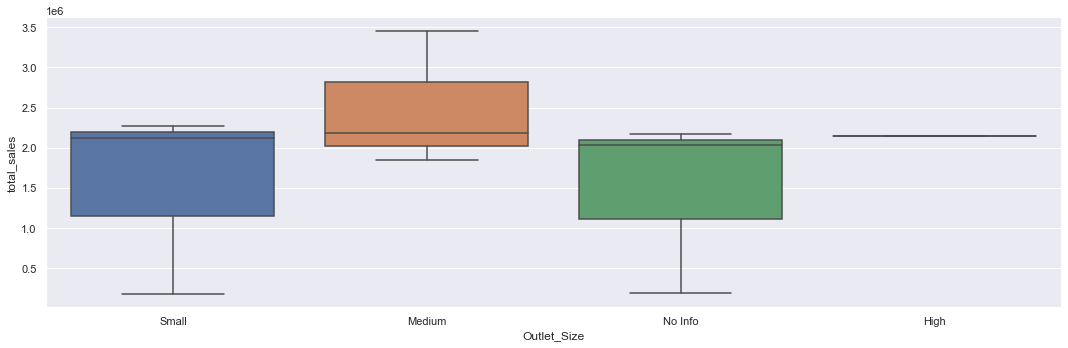

In [361]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Outlet_Size", y="total_sales", kind="box", data=df_stores ,aspect= 3 )

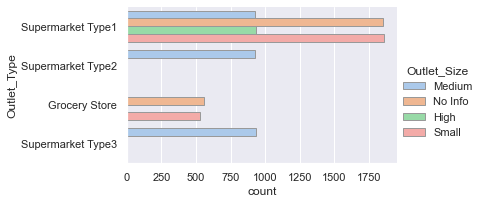

In [362]:
# Revisamos los otras categorias relacionadas a Outlet_Size, para ver si podemos crear una regla de reemplazo.
sns.catplot(y="Outlet_Type",hue="Outlet_Size", kind="count",
            palette="pastel", edgecolor=".6",
            data=df, aspect= 2, height=3)

##### Reemplazo Outlet_Size
- Las 3 tiendas que no tienen informacion de outlet_size, solo una de ellas podriamos decir que es "Small", dada su baja venta y numero de productos catalogados.
- Para las otras dos tiendas, no tenemos como diferenciar si son "Medium" o "High", dado esto las dejaremos como "Medium" ya que es la moda.

In [363]:
# Creaoms un datframe solo con los outlet sin informacion de size:
df_stores = df_stores[df_stores['Outlet_Size'] == 'No Info']

# En este datframe creamos una nueva columna con la regla de negocios:
df_stores['new_size'] = np.where(df_stores['total_items']  < 900 , 'Small', 'Medium')

#Revisamos
df_stores

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_9500\23313130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stores['new_size'] = np.where(df_stores['total_items']  < 900 , 'Small', 'Medium')


,Outlet_Location_Type,Outlet_Identifier,Outlet_Size,total_items,total_item_types,total_visibility,total_sales,total_wight,new_size
3,Tier 2,OUT017,No Info,926,16,56.834646,2.167465e+06,11877.495,Medium
5,Tier 2,OUT045,No Info,929,16,56.180780,2.036725e+06,11751.840,Medium
6,Tier 3,OUT010,No Info,555,16,56.308832,1.883402e+05,7166.800,Small


In [364]:
# Traemos los nuevos Outlet_Sizes al datframe original con merge:
df = df.merge(df_stores[['Outlet_Identifier','new_size']], how = 'left' , on = 'Outlet_Identifier')

#Realizamos el reemplazo donde los outlet_size son "No Info":
df['Outlet_Size'] = np.where(df['Outlet_Size']  == 'No Info' , df['new_size'], df['Outlet_Size'])

#Revisamos
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


[Text(0, 0, '1'), Text(0, 0, '5'), Text(0, 0, '4')]

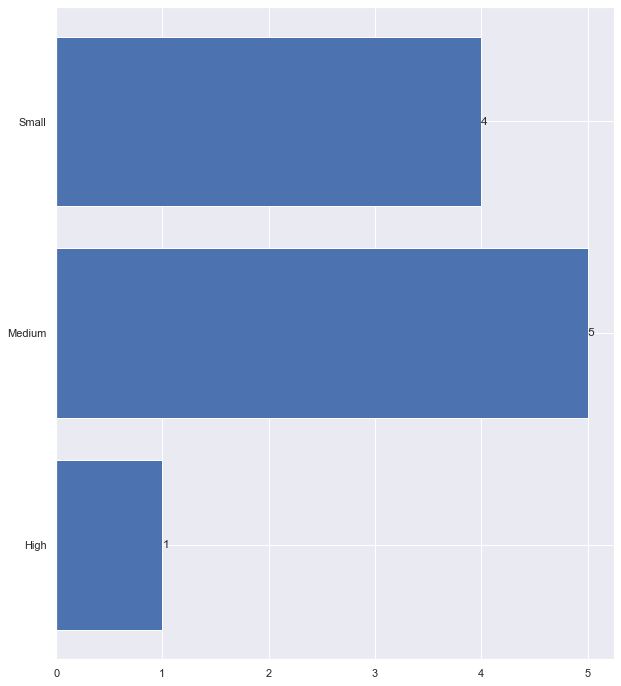

In [365]:
# Revisamos Outlet_Size final, una vez corregido
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Identifier'].nunique().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

## Proyecto 1 - Parte 3
---
- Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

In [366]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


#### 3.1 Visualizaciones

[Text(0, 0, '1.26553e+06'),
 Text(0, 0, '553237'),
 Text(0, 0, '232299'),
 Text(0, 0, '1.44415e+06'),
 Text(0, 0, '1.52259e+06'),
 Text(0, 0, '1.82573e+06'),
 Text(0, 0, '2.82006e+06'),
 Text(0, 0, '457793'),
 Text(0, 0, '1.0452e+06'),
 Text(0, 0, '2.05549e+06'),
 Text(0, 0, '917566'),
 Text(0, 0, '325518'),
 Text(0, 0, '148868'),
 Text(0, 0, '2.73279e+06'),
 Text(0, 0, '892898'),
 Text(0, 0, '351401')]

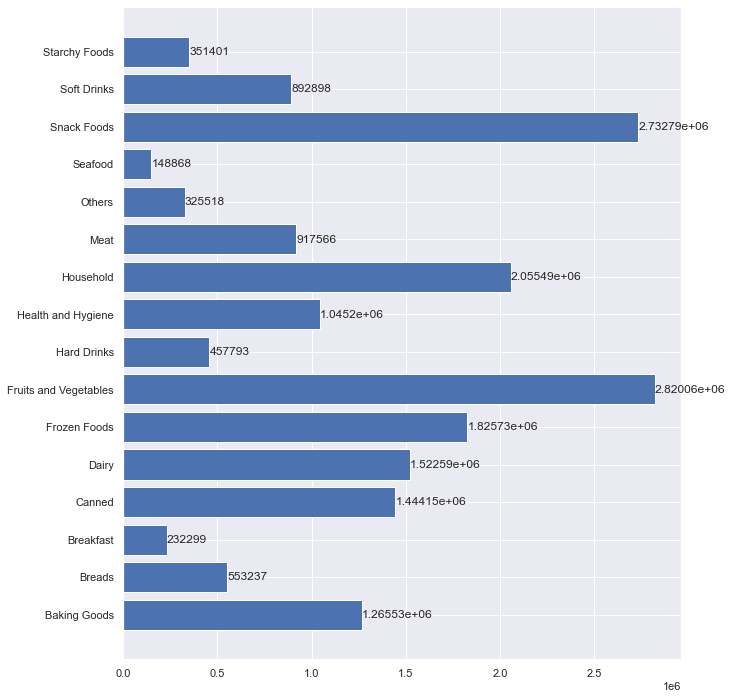

In [367]:
# Revisamos cuales son los Item_Type con mayor venta
df_Item_Type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()

fig, ax = plt.subplots()
bars = ax.barh(df_Item_Type['Item_Type'], df_Item_Type['Item_Outlet_Sales'])
ax.bar_label(bars)

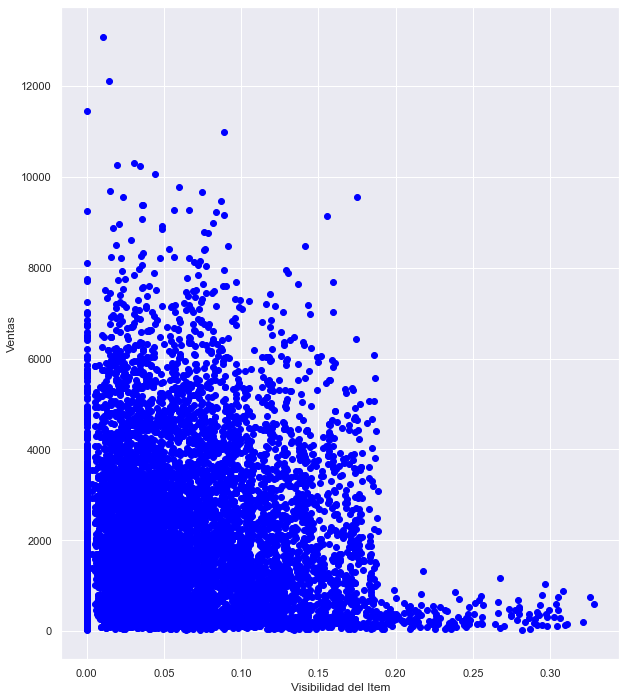

In [368]:
# Veremos la correlacion entre la variable de visbilidad del pructo y sus ventas
x = df['Item_Visibility']
y = df['Item_Outlet_Sales']
 
plt.scatter(x, y, c ="blue")

plt.xlabel("Visibilidad del Item")
plt.ylabel("Ventas")
# To show the plot
plt.show()

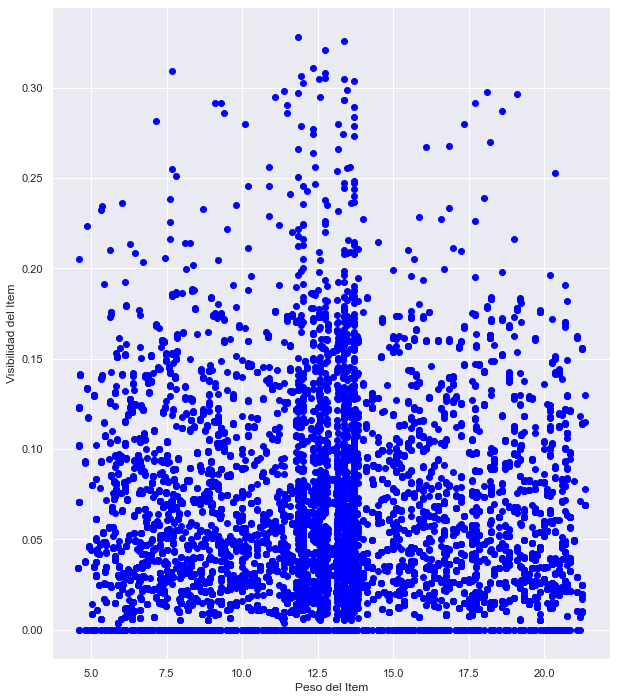

In [369]:
# Veremos la correlacion entre la variable de visbilidad del pructo y sus ventas
x = df['Item_Weight']
y = df['Item_Visibility']
 
plt.scatter(x, y, c ="blue")

plt.xlabel("Peso del Item")
plt.ylabel("Visibilidad del Item")

# To show the plot
plt.show()

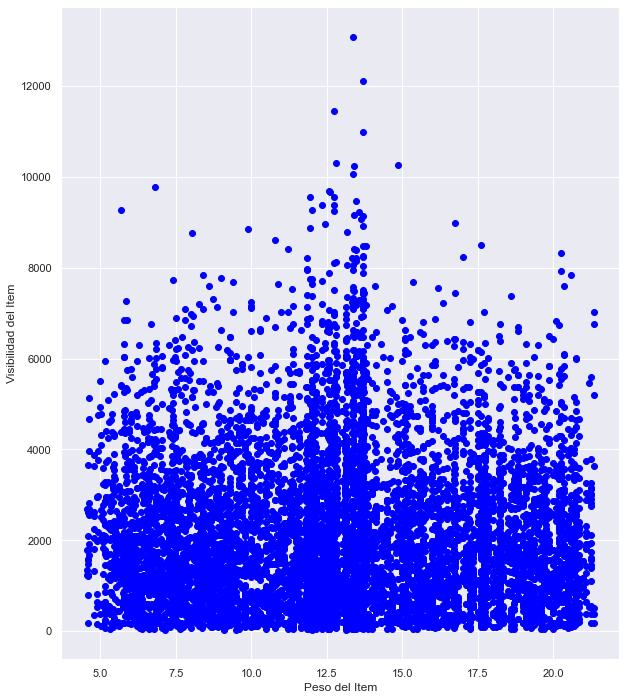

In [370]:
# Veremos la correlacion entre la variable de visbilidad del pructo y sus ventas
x = df['Item_Weight']
y = df['Item_Outlet_Sales']
 
plt.scatter(x, y, c ="blue")

plt.xlabel("Peso del Item")
plt.ylabel("Visibilidad del Item")

# To show the plot
plt.show()

## Proyecto 1 - Parte 4

### Análisis Estadístico
---
- Histogramas para ver la distribución de varias características en tu conjunto de datos
- Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.
- Bonus: mapas de calor de las correlaciones entre características
- Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

### 4.1 Histogramas

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

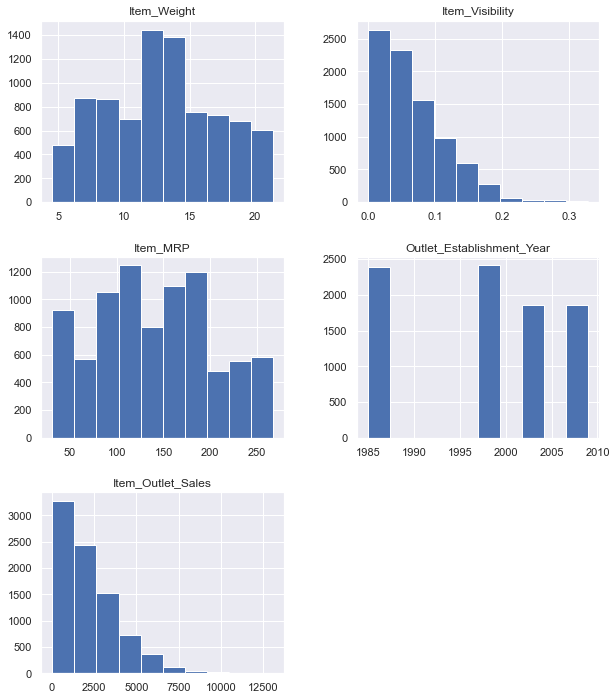

In [371]:
df.hist()

- Vemos como Item_Weight tiene una distribucion normal.
- Item_Visibility vemos que tiene una distribucion asietrica positiva.
- Item_MRP nos muestra que los valores de los precios estan bien distribuidos, sin concentrarce en algun extremo.
- Item_Outlet_Sales tambien muestra una distribucion asimetrica positiva con algunos outliers.
- Outlet_Establishment_Year muestra que hay mas salas abiertas en dos años en particular.

### 4.2 Diagramas de Caja

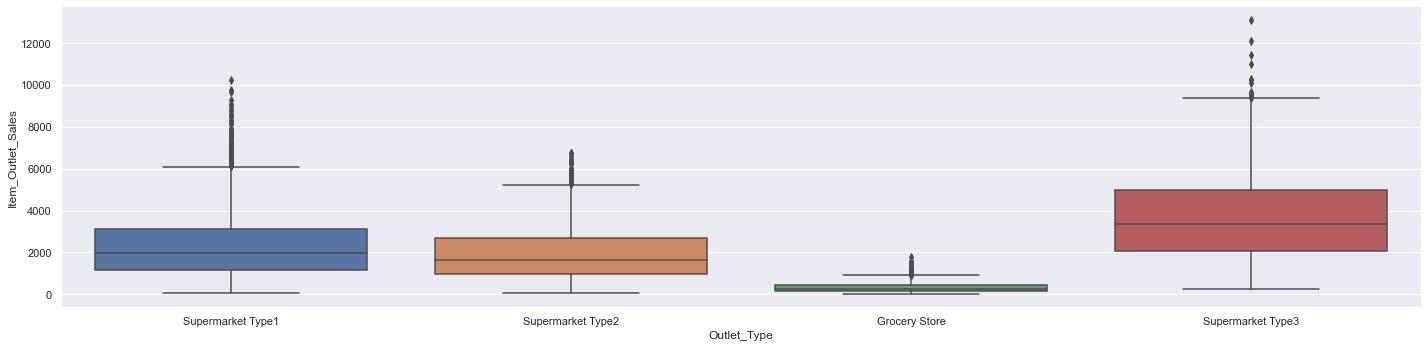

In [372]:
# Primer Grafico: Revisamos el contenido de grasa Low Fat / Regular para cada tipo de categoria de alimento.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Outlet_Type", y="Item_Outlet_Sales", kind="box", data=df ,aspect= 4 )

- Al analizar el boxplot anterior, vemos que el **Outlet_Type** que tiene mayores ventas es **Supermarket Type3** seguido de **Supermarket Type1**.
- El formato Grocery Store tiene ventas muy bajas comparadadas con los tipos supermarkets.

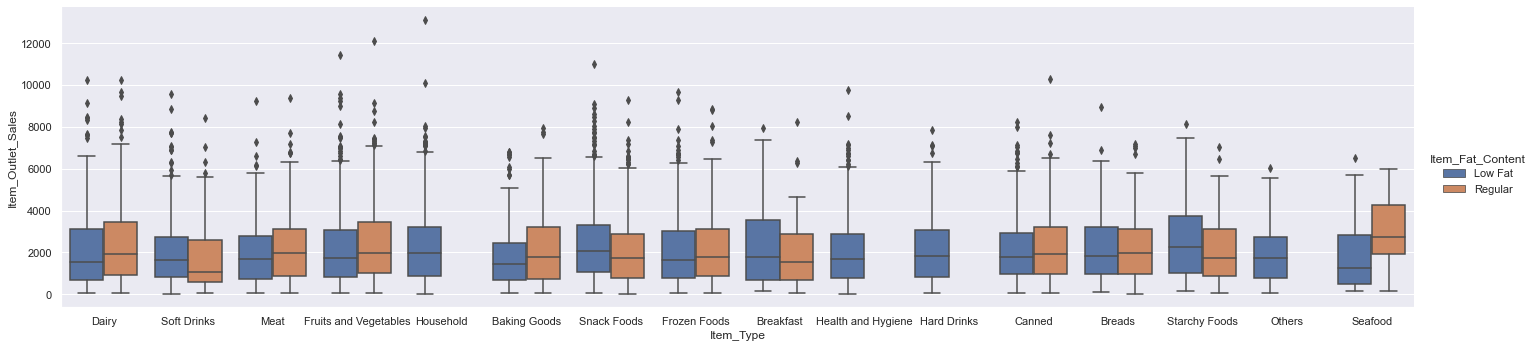

In [373]:
# Revisamos la diferencia en ventas por tienda y tipo de fat content

sns.set(rc={'figure.figsize':(10,12)})
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", kind="box", data=df ,aspect= 4 )

Revisando las ventas por Item_Type y Item_Fat_Content, vemos que para la mayoria de item_type la categoria "Regular" tiene ventas superiores a las de Low Fat, a excepcion de "Soft Drinks", "Snack Foods", "Breakfast" y "Starchy Foods".

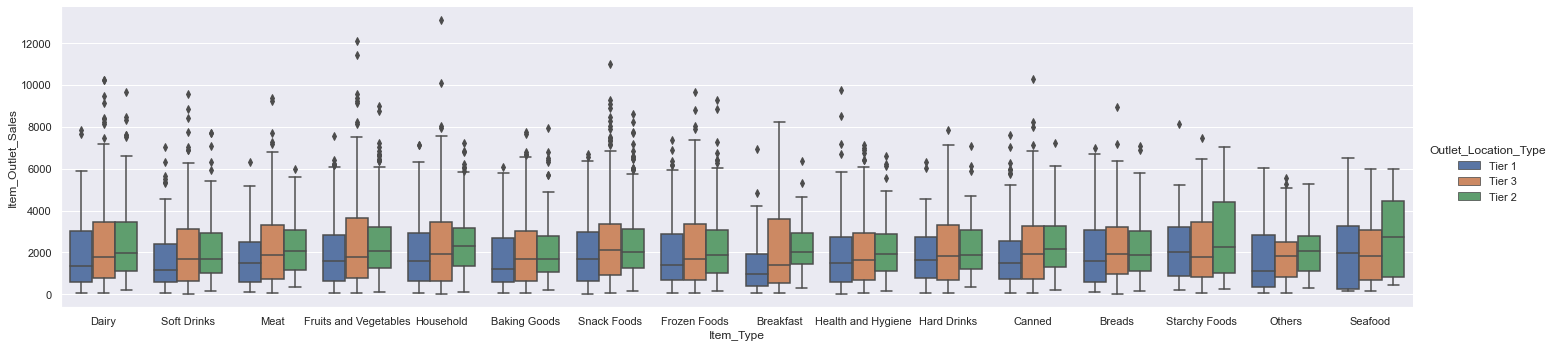

In [374]:
# Primer Grafico: Revisamos el contenido de grasa Low Fat / Regular para cada tipo de categoria de alimento.
sns.set(rc={'figure.figsize':(10,12)})
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Location_Type", kind="box", data=df ,aspect= 4 )

Vemos que consistentemente a lo largo de todos los **Item_Type**, el **Outlet_Location_Type** del Tier 2, tiene mayores ventas que el Tier 1 o Tier 3. 

### 4.3 Mapa Correlacion

In [375]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_9500\2362800189.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


- Revisando que variables impactan **Item_Outlet_Sales**, vemos que Item_MRP es que la que tiene una correlacion positiva y sigfinicativa, el resto de las variables no muestran una correlacion significativa.

## Proyecto 1 - Parte 5

### Base Final

In [377]:
df2 = df.copy()
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


#### One Hot Econding

In [378]:
# Get one hot encoding of columns Item_Type
one_hot = pd.get_dummies(df2['Item_Type'])

# Drop column Item_Type as it is now encoded
df2 = df2.drop('Item_Type',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,1
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,1,0,0,0,0
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,...,0,1,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0


In [379]:
# Get one hot encoding of columns Outlet_Location_Type
one_hot = pd.get_dummies(df2['Outlet_Location_Type'])

# Drop column Outlet_Location_Type as it is now encoded
df2 = df2.drop('Outlet_Location_Type',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,...,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Tier 1,Tier 2
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,1,0
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,1,0,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Supermarket Type1,2097.2700,...,0,0,0,1,0,0,0,0,1,0
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Small,Grocery Store,732.3800,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Supermarket Type1,994.7052,...,0,0,1,0,0,0,0,0,0,0


In [380]:
# Get one hot encoding of columns Outlet_Type
one_hot = pd.get_dummies(df2['Outlet_Type'])

# Drop column Outlet_Type as it is now encoded
df2 = df2.drop('Outlet_Type',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,new_size,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Tier 1,Tier 2,Grocery Store,Supermarket Type1,Supermarket Type2
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,3735.1380,NaN,...,0,0,0,0,0,1,0,0,1,0
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,443.4228,NaN,...,0,0,0,0,1,0,0,0,0,1
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,2097.2700,NaN,...,1,0,0,0,0,1,0,0,1,0
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Small,732.3800,Small,...,0,0,0,0,0,0,0,1,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,994.7052,NaN,...,0,0,0,0,0,0,0,0,1,0


In [381]:
# Get one hot encoding of columns Outlet_Size
one_hot = pd.get_dummies(df2['Outlet_Size'])

# Drop column Outlet_Size as it is now encoded
df2 = df2.drop('Outlet_Size',axis = 1)


# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,new_size,Baking Goods,...,Seafood,Snack Foods,Soft Drinks,Tier 1,Tier 2,Grocery Store,Supermarket Type1,Supermarket Type2,High,Medium
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,3735.1380,NaN,0,...,0,0,0,1,0,0,1,0,0,1
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,443.4228,NaN,0,...,0,0,1,0,0,0,0,1,0,1
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,2097.2700,NaN,0,...,0,0,0,1,0,0,1,0,0,1
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,732.3800,Small,0,...,0,0,0,0,0,1,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,994.7052,NaN,0,...,0,0,0,0,0,0,1,0,1,0


In [382]:
# Get one hot encoding of columns Outlet_Identifier
one_hot = pd.get_dummies(df2['Outlet_Identifier'])

# Drop column Outlet_Identifier as it is now encoded
df2 = df2.drop('Outlet_Identifier',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,new_size,Baking Goods,Breads,...,Medium,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046
0,FDA15,9.30,Low Fat,0.016047,249.8092,1999,3735.1380,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.2692,2009,443.4228,NaN,0,0,...,1,0,0,0,1,0,0,0,0,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,1999,2097.2700,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,182.0950,1998,732.3800,Small,0,0,...,0,1,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,1987,994.7052,NaN,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Limpieza Columnas

In [383]:
# Hacemos Copia del df
df_regression = df2.copy()

# Borramos Columans que no van en el modelo
df_regression.drop(columns={'Item_Identifier','new_size'},inplace=True)

# Aplicamos encoding a Item_Fat_Content
dict_Item_Fat_Content = {'Low Fat':0,'Regular':1}
df_regression.replace({"Item_Fat_Content": dict_Item_Fat_Content},inplace=True)

# Revismaos Salida
df_regression.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,...,Medium,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046
0,9.30,0,0.016047,249.8092,1999,3735.1380,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,443.4228,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1999,2097.2700,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,732.3800,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,994.7052,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Creamos sets de entrenamiento y test

In [384]:
x = df_regression.drop(columns='Item_Outlet_Sales')
y = df_regression['Item_Outlet_Sales']
print(len(x))
print(len(y))

8523
8523


In [385]:
# Importamos train_test_split para separar nuestro datframe entre train y test
from sklearn.model_selection import train_test_split


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
# x_train= x_train.reshape(-1, 1)
# x_test = x_test.reshape(-1, 1)

train , test = train_test_split(df_regression, test_size = 0.3, random_state=42)

# Entrenamiento
x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

# Testeo
x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

########################################################################################################################

# Pre procesamiento el scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicamos Scaler a trin y test
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [386]:
print(len(x))
print(len(y))

8523
8523


### Modelo KNN

#### 1. Validamos K

RMSE value for k=  1 is: 1516.063121485852
RMSE value for k=  2 is: 1336.7958873473808
RMSE value for k=  3 is: 1281.648634127439
RMSE value for k=  4 is: 1239.3443906259101
RMSE value for k=  5 is: 1215.91542917841
RMSE value for k=  6 is: 1207.7118155727246
RMSE value for k=  7 is: 1208.9466159738554
RMSE value for k=  8 is: 1208.5685695905008
RMSE value for k=  9 is: 1210.8413218349474
RMSE value for k=  10 is: 1212.8500648564564
RMSE value for k=  11 is: 1219.7957481836565
RMSE value for k=  12 is: 1227.4323498128517
RMSE value for k=  13 is: 1233.6309871086573
RMSE value for k=  14 is: 1238.1777045372087
RMSE value for k=  15 is: 1240.1614738654805
RMSE value for k=  16 is: 1245.5285737431575
RMSE value for k=  17 is: 1254.8532904019228
RMSE value for k=  18 is: 1259.1395101099577
RMSE value for k=  19 is: 1266.1594100095776
RMSE value for k=  20 is: 1269.2763073625563
1207.7118155727246


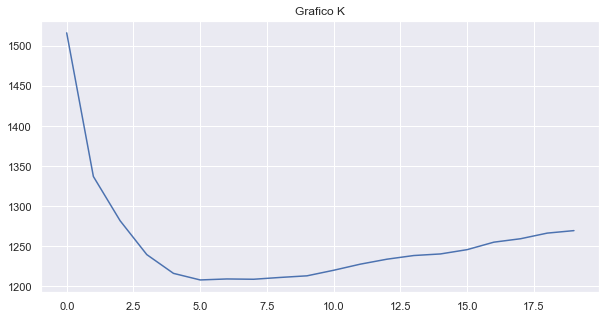

In [394]:
# Hacemos un for para optimizar le numero de K, con el error cuadratico medio

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

print(min(rmse_val))

# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
plt.figure(figsize=(10, 5))
plt.plot(curve)
plt.title('Grafico K')
plt.show()

#### Aplicamos KNN

In [395]:
# Aplicamos el modelo

# Entrenamos el modelo con K = 7
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the model

# Predecimos
pred = model.predict(x_test) #make prediction on test set

# Variable original
y_lista = np.array(y_test)

y_lista

array([1743.0644,  356.8688,  377.5086, ...,  767.0016,  642.497 ,
       2570.6538])

#### Calculamos Metricas

 
---------------------------------------------
|    Calculamos las metricas del modelo     |
---------------------------------------------

El R2 del modelo es 0.4782023214271993
Mean Squared Error: 1461551.9202746365
Root Mean Squared Error: 1208.9466159738554


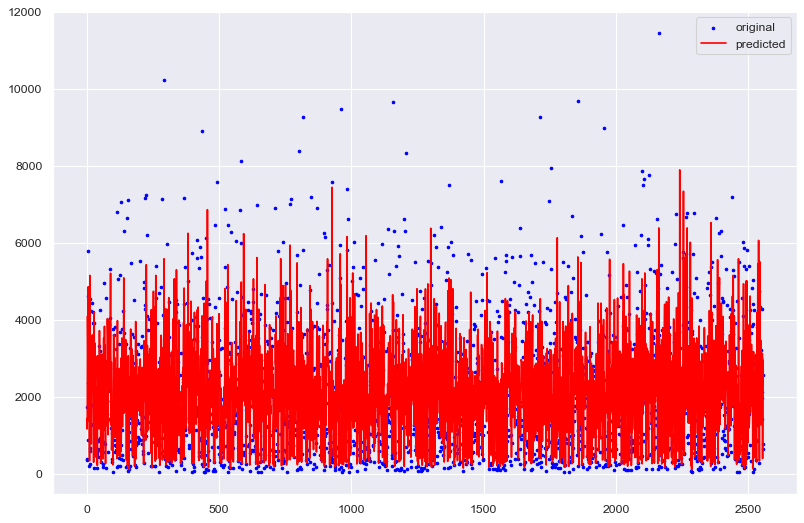

<Figure size 720x360 with 0 Axes>

In [399]:
# Calculamos metricas del modelo y graficamos las predicciones vs los valores de test.

print(''' 
---------------------------------------------
|    Calculamos las metricas del modelo     |
---------------------------------------------
''')


score = model.score(x_test,y_test)
print('El R2 del modelo es ' + str(score))

mse =mean_squared_error(y_lista, pred)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)


from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

x_ax=range(len(y_test))
plt.scatter(x_ax, y_lista, s=5, color="blue", label="original")
plt.plot(x_ax, pred,lw=1.5, color="red", label="predicted")
plt.legend()
plt.figure(figsize=(10, 5))
plt.show()

### Modelo Regresion Lineal

#### Aplicamos Modelo

In [387]:
# Traemos el modelo
mlr = LinearRegression(fit_intercept=True)

# Entrenamos modelo con train
mlr.fit(x_train,y_train)

LinearRegression()

In [388]:
print(mlr.intercept_, mlr.coef_, mlr.score(x_train, y_train))

-1.9294230304857296e+16 [-2.87491034e+01  9.04520881e+00 -5.83778530e+01  3.91903752e+03
 -5.28698343e+15  2.74348601e+02  3.82492904e+02  9.10830263e+02
  4.17556253e+02  1.56275648e+02  3.60106823e+02  2.92988606e+02
  4.73389826e+02 -5.01126070e+00  3.07769955e+02  5.31053034e+02
  3.85669941e+02  4.99782211e+02  3.18959570e+02  6.30196862e+01
 -3.21972450e+16 -8.39182901e+16  3.33907697e+16  2.06636589e+16
 -6.19785341e+15 -4.75861268e+14  3.39118900e+16 -1.12327567e+16
 -4.52985420e+14  5.34833730e+16 -3.13282286e+15  1.81007056e+16
 -1.46176597e+16  8.67343900e+16  5.23819181e+16  3.34713080e+16] 0.546616741745563


In [389]:
#Prediction of test set
y_pred_mlr = mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [1424.  216.  912. ... 1160. 2080. 3792.]


In [390]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
7503,1743.0644,1424.0
2957,356.8688,216.0
7031,377.5086,912.0
1084,5778.4782,3872.0
856,2356.9320,3440.0


#### Calculamos Metricas

R squared: 0.55
Mean Absolute Error: 830.4381149784904
Mean Square Error: 1257361.2939776203
Root Mean Square Error: 1121.3212269361622


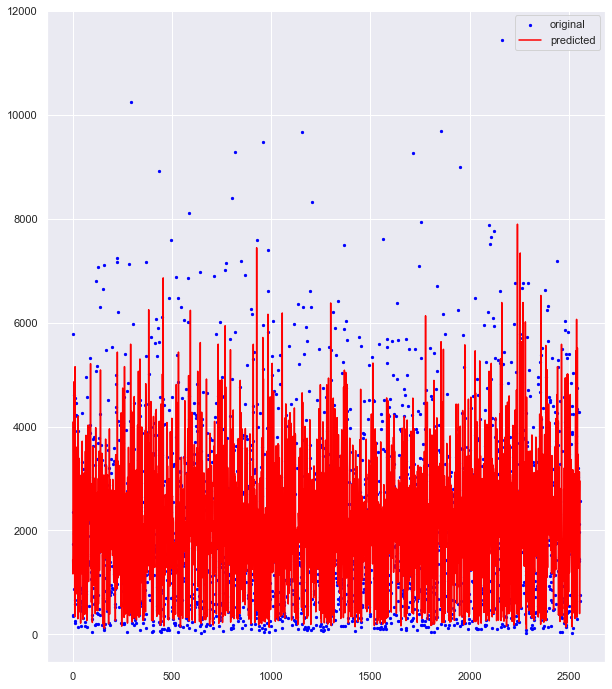

<Figure size 720x360 with 0 Axes>

In [401]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(x_test,y_test)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


x_ax = range(len(y_test))
plt.scatter(x_ax, y_lista, s=5, color="blue", label="original")
plt.plot(x_ax, pred,lw=1.5, color="red", label="predicted")
plt.legend()
plt.figure(figsize=(10, 5))
plt.show()


In [298]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 38703.04257293476
Coefficients: 
 [-2.30389104e-01  4.06714677e+01 -3.04142870e+02  1.55648936e+01
 -1.95193225e+01 -5.80692848e+00 -4.97690472e-01  1.63319538e+00
  1.97201731e+01 -4.67309573e+01 -3.39397708e+01  2.38254689e+01
 -5.91745212e+00 -1.65714983e+01 -4.52594747e+01 -6.36037716e+00
 -2.76557339e+01  1.79013819e+02 -1.73382064e+01 -3.34589074e+01
  1.53443405e+01 -1.34583121e+02  7.62005581e+01  5.83825633e+01
 -9.45441794e+02  3.37382709e+02 -1.05807574e+01  6.18639843e+02
 -9.82967962e+01  2.82951207e+02 -1.84654411e+02 -4.51379726e+02
 -9.82967962e+01 -3.35866634e+01 -1.05807574e+01 -4.94062068e+02
  6.18639843e+02  4.15085556e+02 -3.05298334e+02  3.45701828e+02
  1.37771192e+01]
                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statis

### Random Forest